In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
mean_data = df.loc[:, ['open', 'close']].mean(axis=1)
df['mean_data']=mean_data
# dataset=df[['date','mean_data']]
dataset=df[['mean_data']]

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
model = SARIMAX(dataset, order=(1,1,1), seasonal_order=(1,1,1,12))


In [14]:
dataset2 = dataset.diff().dropna()
# print(dataset2)
result = adfuller(dataset2)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -32.003894819310545
p-value: 0.0


<Figure size 1000x500 with 0 Axes>

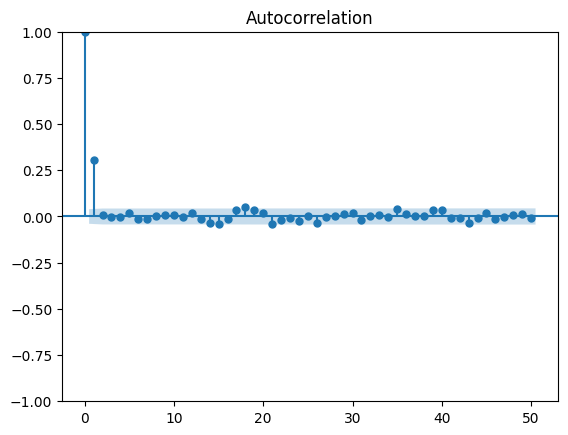

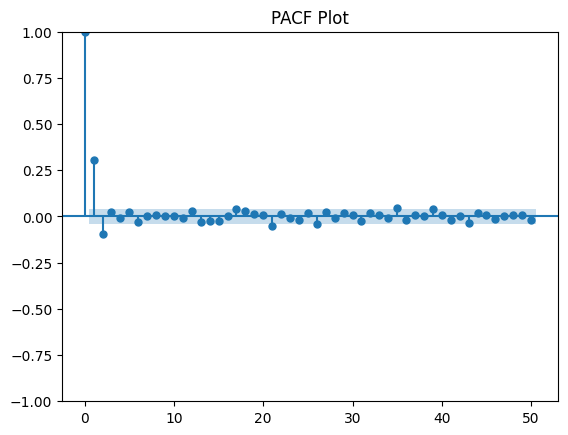

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_acf(dataset2, lags=50)
plot_pacf(dataset2, lags=50)
plt.title('ACF Plot')
plt.title('PACF Plot')
plt.show()

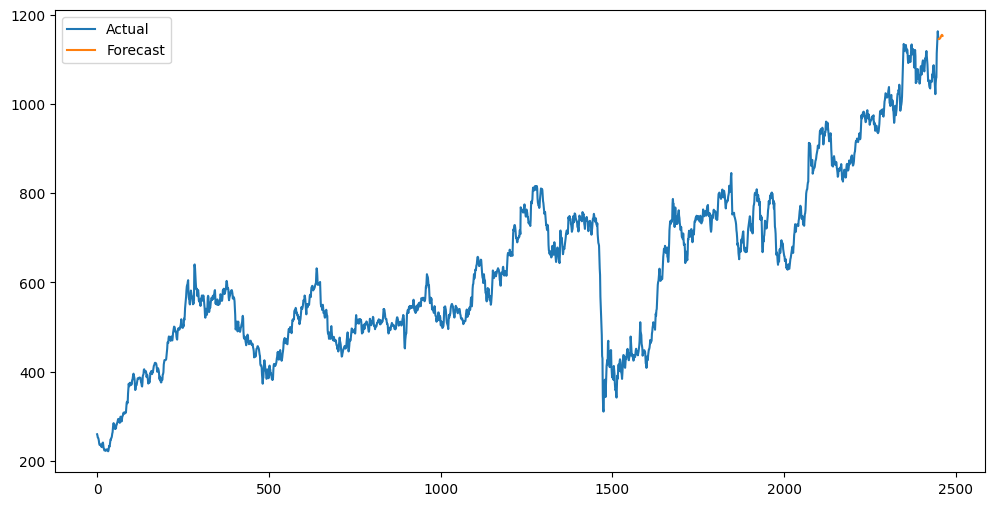

In [13]:
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

# Visualize Predictions
plt.figure(figsize=(12,6))
plt.plot(dataset, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.show()